# import libraries

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import sys
from global_land_mask import globe
import matplotlib.patches as mpatches
import utils_v1v2 as v1v2
import os
from matplotlib.gridspec import GridSpec
from matplotlib import ticker


import matplotlib as mpl
mpl.rcParams['font.size'] = 14
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15
mpl.rcParams['axes.labelsize'] = 15
mpl.rcParams["legend.handlelength"] = 1.0
mpl.rcParams["legend.frameon"] = True

workdir = '/home/qin4/From_Compy/home_dir/'
datadir0 = '/p/user_pub/climate_work/qin4/From_Compy/compyfs_dir/'
figdir = workdir+'/scripts/published/figure/'

sys.path.append(workdir+'diag_feedback_E3SM/')
import PlotDefinedFunction as PDF

from datetime import date
today = date.today()
dd = today.strftime("%Y-%m-%d")
print(dd)

2023-10-04


# do fixed regime-partitioning

## define cases

In [21]:
tab20c = v1v2.get_color('tab20',20)

# tag = 'gradual' 
# tag = 'MG_single'
tag = 'single'

v1c = 'tab:grey'
v1Allc = tab20c[6]
gwc = tab20c[7]
trigc = tab20c[5]
ullc = 'forestgreen'
gustc = tab20c[4]
ZMc = tab20c[3]
MGc = tab20c[2]
clubbc = tab20c[1]
v2c = tab20c[0] 

MG_Bergc = tab20c[9]
MG_mincdncc = tab20c[11]
MG_accrec = tab20c[13]
MG_autoc = tab20c[15]
MG_wsubc = tab20c[17]


if tag == 'gradual':
    #========================================================
    case_stamp = [\
    'v1', \
    'v1.All',\
    'v2.bk.clubb.MG.ZM.gust.trig.gw',\
    'v2.bk.clubb.MG.ZM.gust.trig',\
    'v2.bk.clubb.MG.ZM.gust',\
    'v2.bk.clubb.MG.ZM',\
    'v2.bk.clubb.MG',\
    'v2.bk.clubb',\
    'v2.OutTend',\
    ]

    case_stamp_out = [
    'v1', \
    'v2.v1(All)',\
    'v2.v1(clubb.MG.ZMother.gust.ZMtrig.gw)',\
    'v2.v1(clubb.MG.ZMother.gust.ZMtrig)',\
    'v2.v1(clubb.MG.ZMother.gust)',\
    'v2.v1(clubb.MG.ZMother)',\
    'v2.v1(clubb.MG)',\
    'v2.v1(clubb)',\
    'v2',\
    ]
    
    colors = [
        v1c,
        v1Allc,
        gwc,
        trigc,
        gustc,
        ZMc,
        MGc,
        clubbc,
        v2c
    ]
    

elif tag == 'single':
    #========================================================
    case_stamp = [
    'v1', 
    # 'v1.All',
    # 'v2.bk.trig',
    # 'v2.bk.trig_ull',  
    # 'v2.bk.MG',
    # 'v2.bk.ZM',
    # 'v2.bk.clubb',
    'v2.OutTend',
    ]

    case_stamp_out = [
    'v1', 
    # 'v2.v1(All)',\
    # 'v2.v1(ZMtrig)',\
    # 'v2.v1(ZMtrig_ULL)',\
    # 'v2.v1(MG)',\
    # 'v2.v1(ZMother)',\
    # 'v2.v1(clubb)',\
    'v2',\
    ]
    
    colors = [
        v1c, 
        # v1Allc,
        # trigc, 
        # ullc,
        # MGc,
        # ZMc,
        # clubbc,
        v2c
    ]

elif tag == 'MG_single':
    #========================================================
    case_stamp = [\
    'v2.bk.MG',\
    'v2.bk.MG_Berg',\
    'v2.bk.MG_mincdnc',\
    'v2.bk.MG_accre',\
    'v2.bk.MG_auto',\
    'v2.bk.MG_wsub',\
    'v2.OutTend',\
    ]
    
    case_stamp_out = [\
    'v2.v1(MG)',\
    'v2.v1(MG_Berg)',\
    'v2.v1(MG_mincdnc)',\
    'v2.v1(MG_accre)',\
    'v2.v1(MG_auto)',\
    'v2.v1(MG_wsub)',\
    'v2',\
    ]
    
    colors = [\
    MGc,
    MG_Bergc,
    MG_mincdncc,
    MG_accrec, 
    MG_autoc, 
    MG_wsubc,
    v2c,
    ]

print(len(case_stamp),len(case_stamp_out),colors)

2 2 ['tab:grey', (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)]


## read OMEGA and get ensemble mean of all cases

(73, 144)
(73, 144)


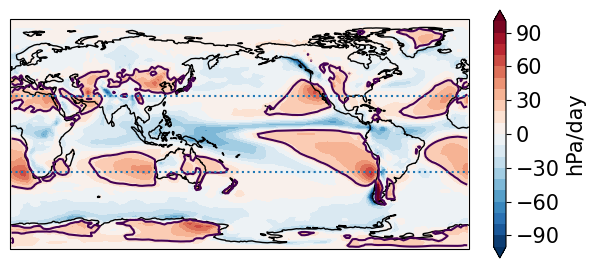

In [22]:
Vars = ['OMEGA700','EIS']

dicr = {}
for case in case_stamp:
    
    dicr[case] = {}
    for var in Vars:
        # ============= read data ==================================
        datadir = workdir+'diag_feedback_E3SM/data/'
        fname = 'global_'+var+'_'+case+'.nc'
    
        f = xr.open_dataset(datadir+fname)
        data1 = f[var+'_pi_clim']
        data2 = f[var+'_ab_clim']
        f.close()
        
        # ensure the lat and lon names 
        latnew, lonnew = list(data1.coords.keys())[0], list(data1.coords.keys())[1]
        data1 = data1.rename({lonnew: 'lon',latnew: 'lat'})

        latnew, lonnew = list(data2.coords.keys())[0], list(data2.coords.keys())[1]
        data2 = data2.rename({lonnew: 'lon',latnew: 'lat'})
        
        if var == 'OMEGA700':
            scale = 864.
        else:
            scale = 1.0 
        dicr[case][var+'_pi'] = data1*scale
        dicr[case][var+'_ab'] = data2*scale  
        dicr[case][var+'_avg'] = (data1*scale+data2*scale)/2. 

# =========== get ensemble mean
omega700_pi_mm = xr.concat([dicr[case]['OMEGA700_pi'] for case in dicr.keys()],dim="case_dim").mean(axis=0)
omega700_ab_mm = xr.concat([dicr[case]['OMEGA700_ab'] for case in dicr.keys()],dim="case_dim").mean(axis=0)
omega700_avg_mm = xr.concat([dicr[case]['OMEGA700_avg'] for case in dicr.keys()],dim="case_dim").mean(axis=0)

print(omega700_pi_mm.shape)

EIS_pi_mm = xr.concat([dicr[case]['EIS_pi'] for case in dicr.keys()],dim="case_dim").mean(axis=0)
EIS_ab_mm = xr.concat([dicr[case]['EIS_ab'] for case in dicr.keys()],dim="case_dim").mean(axis=0)
EIS_avg_mm = xr.concat([dicr[case]['EIS_avg'] for case in dicr.keys()],dim="case_dim").mean(axis=0)

print(EIS_pi_mm.shape)


# =========== check spatial map 
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree(180.))

datap = omega700_pi_mm 
# datap = EIS_pi_mm

im = ax.contourf(datap.lon,datap.lat,datap,transform=ccrs.PlateCarree(),
                cmap='RdBu_r',
                levels=np.arange(-100,110,10),
                extend='both')

ax.contour(datap.lon,datap.lat,datap,transform=ccrs.PlateCarree(),
           levels=[15])
ax.coastlines()
ax.set_global()

fig.colorbar(im,fraction=0.025,label='hPa/day')

ax.axhline(y=30,ls=':')
ax.axhline(y=-30,ls=':')

## read data and do partitioning

In [23]:
what_state = 'avgCTLP4K' # 'CTL','P4K','avgCTLP4K'
EIS_threshold = 2.5 

data_source = 'CRK' 
# data_source = 'RK'

v1 LO680_NETdunobsc_fbk (90, 144)
reg= StratCu
StratCu pi_avg= 0.06722131921980701 ab_avg= 0.08695540825050199 avg_avg= 0.07790814045637645 cum pi_avg= 0.06722131921980701 cum ab_avg= 0.08695540825050199 cum avg_avg= 0.07790814045637645
reg= TradeCu
TradeCu pi_avg= 0.20999610493910792 ab_avg= 0.1883591760070515 avg_avg= 0.19880091900436578 cum pi_avg= 0.2772174241589149 cum ab_avg= 0.2753145842575535 cum avg_avg= 0.2767090594607422
reg= TropAscent
TropAscent pi_avg= 0.1538754870177987 ab_avg= 0.15665574056092538 avg_avg= 0.15567633133304795 cum pi_avg= 0.43109291117671367 cum ab_avg= 0.43197032481847886 cum avg_avg= 0.4323853907937901
reg= MidLatOcn
MidLatOcn pi_avg= 0.204009829007139 ab_avg= 0.20313241536537374 avg_avg= 0.20271734939006236 cum pi_avg= 0.6351027401838527 cum ab_avg= 0.6351027401838526 cum avg_avg= 0.6351027401838525
reg= TotalOcn
TotalOcn pi_avg= 0.6351027401838526 ab_avg= 0.6351027401838526 avg_avg= 0.6351027401838526 cum pi_avg= 1.2702054803677054 cum ab_avg= 1.27020

/tmp/ipykernel_114904/995971941.py:164: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(im,fraction=0.02)


v2.OutTend LO680_NETdunobsc_fbk (90, 144)
reg= StratCu
StratCu pi_avg= 0.06722131921980701 ab_avg= 0.08695540825050199 avg_avg= 0.07790814045637645 cum pi_avg= 0.06722131921980701 cum ab_avg= 0.08695540825050199 cum avg_avg= 0.07790814045637645
reg= TradeCu
TradeCu pi_avg= 0.20999610493910792 ab_avg= 0.1883591760070515 avg_avg= 0.19880091900436578 cum pi_avg= 0.2772174241589149 cum ab_avg= 0.2753145842575535 cum avg_avg= 0.2767090594607422
reg= TropAscent
TropAscent pi_avg= 0.1538754870177987 ab_avg= 0.15665574056092538 avg_avg= 0.15567633133304795 cum pi_avg= 0.43109291117671367 cum ab_avg= 0.43197032481847886 cum avg_avg= 0.4323853907937901
reg= MidLatOcn
MidLatOcn pi_avg= 0.204009829007139 ab_avg= 0.20313241536537374 avg_avg= 0.20271734939006236 cum pi_avg= 0.6351027401838527 cum ab_avg= 0.6351027401838526 cum avg_avg= 0.6351027401838525
reg= TotalOcn
TotalOcn pi_avg= 0.6351027401838526 ab_avg= 0.6351027401838526 avg_avg= 0.6351027401838526 cum pi_avg= 1.2702054803677054 cum ab_avg=

/tmp/ipykernel_114904/995971941.py:164: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(im,fraction=0.02)


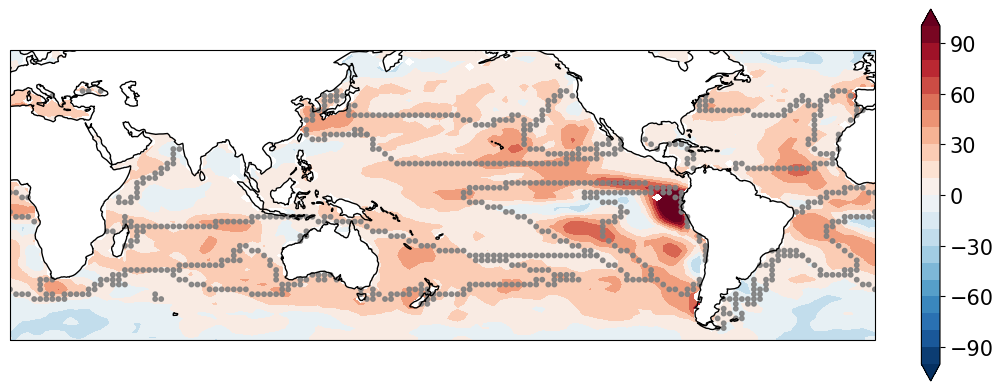

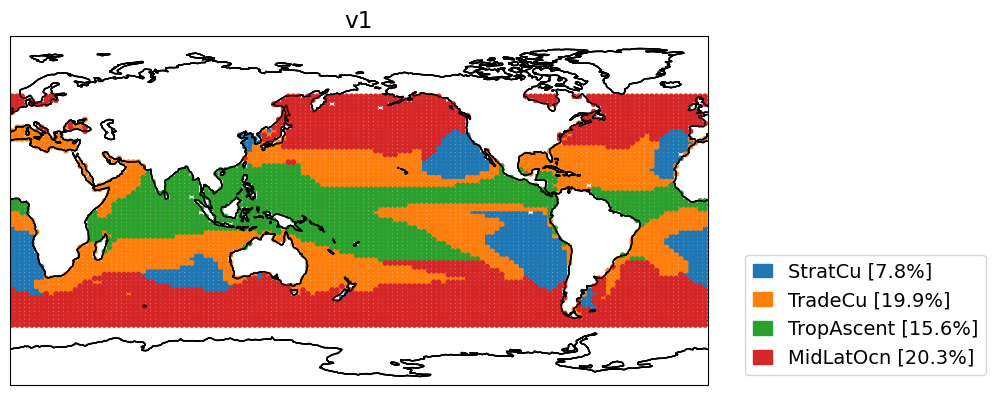

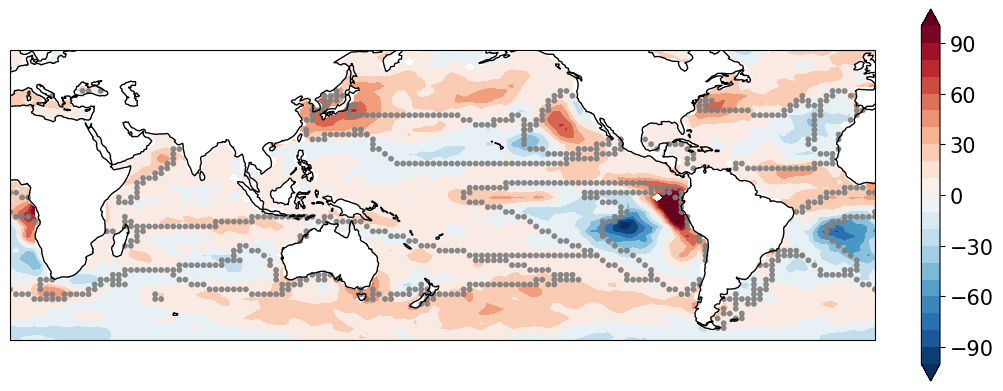

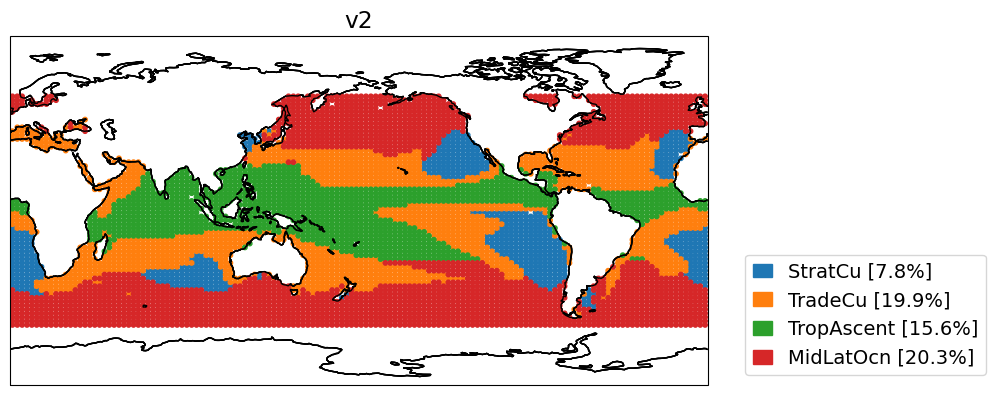

In [24]:
# regimes = ['StratCu','TradeCu','TropAscent','TropLand','MidLatOcn','MidLatLnd','HiLat','Global']
regimes = ['StratCu','TradeCu','TropAscent','MidLatOcn','TotalOcn','Global']

colorsh = v1v2.get_color('tab10',len(regimes))

dics2 = {}
for case,case_out in zip(case_stamp,case_stamp_out):
    
    if data_source == 'RK': 
        datadir = workdir+'diag_feedback_E3SM/data/'
    
        fname = 'lat-lon-gfdbk-CMIP6-'+case+'.nc'
        Vars = ['netCRE_ano_grd_adj'] 
    elif data_source == 'CRK': 
        datadir = workdir+'diag_feedback_E3SM/test1003/'
        
        fname = 'global_cloud_feedback_obsc_'+case+'.nc' 
        Vars = ['LO680_NETdunobsc_fbk']
    
    f1 = xr.open_dataset(datadir+fname)

    dics2[case] = {}
    for svar in Vars: 
        if svar == 'LO680_NETdunobsc_fbk':
            data = f1['LO680_SWdunobsc_fbk'] + f1['LO680_LWdunobsc_fbk'] 
            # ensure the lat and lon names
            latnew, lonnew = list(data.coords.keys())[0], list(data.coords.keys())[1]
            data = data.rename({lonnew: 'lon',latnew: 'lat'})
        else:
            data = f1[svar]
        print(case, svar, data.shape)
        
        # get OMEGA700 and EIS 
        omega700_pi = omega700_pi_mm.interp(lat=data.lat,lon=data.lon)
        EIS_pi = EIS_pi_mm.interp(lat=data.lat,lon=data.lon)
        
        omega700_ab = omega700_ab_mm.interp(lat=data.lat,lon=data.lon)
        EIS_ab = EIS_ab_mm.interp(lat=data.lat,lon=data.lon)
    
        omega700_avg = omega700_avg_mm.interp(lat=data.lat,lon=data.lon)
        EIS_avg = EIS_avg_mm.interp(lat=data.lat,lon=data.lon) 
        
        # use the same lon as omega700 for data and EIS
        data['lon'] = omega700_pi.lon 
        
        # ============== get land mask ========================
        lons = data.coords['lon'].data
        lats = data.coords['lat'].data
        lons_here = np.where(lons>180,lons-360,lons)
        lon_grid,lat_grid = np.meshgrid(lons_here,lats)
        globe_land_mask = globe.is_land(lat_grid,lon_grid)
        globe_land_mask = xr.DataArray(globe_land_mask,coords=data.coords)
        
        fillvalue = np.nan 
        regsum_pi = 0
        regsum_ab = 0 
        regsum_avg = 0 
        dics2[case][svar] = {}
        
        frac_map = np.zeros((omega700_avg.shape))
        frac_map[:] = np.nan
        for ireg,reg in enumerate(regimes):
            print('reg=',reg)
            if reg == 'StratCu':
                data1 = xr.where((data.lat>=-60)&(data.lat<60)&(globe_land_mask==False),data,fillvalue) # select big region and mask land 
                data2_pi = xr.where((omega700_pi>15)&(EIS_pi>EIS_threshold),data1,fillvalue)
                data2_ab = xr.where((omega700_ab>15)&(EIS_ab>EIS_threshold),data1,fillvalue)
                data2_avg = xr.where((omega700_avg>15)&(EIS_avg>EIS_threshold),data1,fillvalue)
            if reg == 'TradeCu':
                data1 = xr.where((data.lat>=-60)&(data.lat<60)&(globe_land_mask==False),data,fillvalue) # select big region and mask land 
                # data2 = xr.where((omega700>0)&(EIS<1),data1,0.0) # definition from Myers and Scott
                data2_pi = xr.where(((omega700_pi>0)&(EIS_pi<EIS_threshold))|((data.lat>=-25)&(data.lat<25)&(omega700_pi>0)&(omega700_pi<15)&(EIS_pi>EIS_threshold)),data1,fillvalue)
                data2_ab = xr.where(((omega700_ab>0)&(EIS_ab<EIS_threshold))|((data.lat>=-25)&(data.lat<25)&(omega700_ab>0)&(omega700_ab<15)&(EIS_ab>EIS_threshold)),data1,fillvalue)
                data2_avg = xr.where(((omega700_avg>0)&(EIS_avg<EIS_threshold))|((data.lat>=-25)&(data.lat<25)&(omega700_avg>0)&(omega700_avg<15)&(EIS_avg>EIS_threshold)),data1,fillvalue)
            if reg == 'TropAscent':
                data1 = xr.where((data.lat>=-25)&(data.lat<25)&(globe_land_mask==False),data,fillvalue) # select big region and mask land 
                data2_pi = xr.where((omega700_pi<0),data1,fillvalue)                
                data2_ab = xr.where((omega700_ab<0),data1,fillvalue)       
                data2_avg = xr.where((omega700_avg<0),data1,fillvalue)       
            if reg == 'MidLatOcn':
                data1 = xr.where((((data.lat>=-60)&(data.lat<-25))|((data.lat<60)&(data.lat>=25)))&(globe_land_mask==False),data,fillvalue) # select big region and mask land 
                data2_pi = xr.where((omega700_pi<0)|((omega700_pi<15)&(EIS_pi>EIS_threshold)),data1,fillvalue) 
                data2_ab = xr.where((omega700_ab<0)|((omega700_ab<15)&(EIS_ab>EIS_threshold)),data1,fillvalue)
                data2_avg = xr.where((omega700_avg<0)|((omega700_avg<15)&(EIS_avg>EIS_threshold)),data1,fillvalue)
            if reg == 'MidLatLnd':
                data1 = xr.where((((data.lat>=-60)&(data.lat<-30))|((data.lat<60)&(data.lat>=30)))&(globe_land_mask==True),data,fillvalue) # select big region and mask land 
                data2_pi = data1 
                data2_ab = data1 
                data2_avg = data1
            if reg == 'TotalOcn': # 60S-60N
                data1 = xr.where((data.lat>=-60)&(data.lat<60)&(globe_land_mask==False),data,fillvalue) # select big region and mask land 
                data2_pi = data1 
                data2_ab = data1 
                data2_avg = data1                
            if reg == 'HiLat':
                data1 = xr.where((((data.lat<-60))|((data.lat>=60))),data,fillvalue) # select big region and mask land 
                data2_pi = data1 
                data2_ab = data1 
                data2_avg = data1 
            if reg == 'TropLand':
                data1 = xr.where((data.lat>=-30)&(data.lat<30)&(globe_land_mask==True),data,fillvalue) # select big region and mask land 
                data2_pi = data1
                data2_ab = data1 
                data2_avg = data1 
            if reg == 'Global':
                data1 = data
                data2_pi = data1 
                data2_ab = data1
                data2_avg = data1 
                
            # ================ fractional area ============================
            data2m_pi = xr.where(np.isnan(data2_pi),0.0,1.0)
            data2m_ab = xr.where(np.isnan(data2_ab),0.0,1.0)
            data2m_avg = xr.where(np.isnan(data2_avg),0.0,1.0)
            # check fractional area to ensure the sum equals to 1. 
            regsum_pi += v1v2.area_averager(data2m_pi).values
            regsum_ab += v1v2.area_averager(data2m_ab).values
            regsum_avg += v1v2.area_averager(data2m_avg).values
            
            print(reg, 
                  'pi_avg=',v1v2.area_averager(data2m_pi).values, 
                  'ab_avg=',v1v2.area_averager(data2m_ab).values, 
                  'avg_avg=',v1v2.area_averager(data2m_avg).values,
                  'cum pi_avg=',regsum_pi, 'cum ab_avg=',regsum_ab, 'cum avg_avg=',regsum_avg)
              
            dics2[case][svar][reg+'_pi'] = xr.where(np.isnan(data2_pi),0.0,data2_pi) 
            dics2[case][svar][reg+'_ab'] = xr.where(np.isnan(data2_ab),0.0,data2_ab)
            dics2[case][svar][reg+'_avg'] = xr.where(np.isnan(data2_avg),0.0,data2_avg)
            dics2[case][svar][reg+'_cmb'] = xr.where((~np.isnan(data2_pi))&(~np.isnan(data2_ab)),data2_pi,0.0)
            dics2[case][svar][reg+'_frc_pi'] = data2m_pi
            dics2[case][svar][reg+'_frc_ab'] = data2m_ab
            dics2[case][svar][reg+'_frc_avg'] = data2m_avg
            
            if reg not in ['TotalOcn','Global']:
                frac_map = xr.where(data2m_avg==0,frac_map,ireg+1)
        
        print()
        
        fig = plt.figure(figsize=(12,12))
        ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree(180))
        lons,lats = data2m_avg.lon,data2m_avg.lat
        
        datap = xr.where(globe_land_mask==False, data, np.nan)
        
        ax.contourf(lons,lats,datap,transform=ccrs.PlateCarree(),
                    cmap = 'RdBu_r',
                    levels=np.arange(-3,3.5,0.5),extend='both')
        
        lon2d,lat2d = np.meshgrid(lons,lats) 

        mask1 = np.diff(frac_map,axis=0,prepend=frac_map[0,0])
        mask2 = np.diff(frac_map,axis=1,prepend=frac_map[0,0]) 

        print(np.nanmin(mask1), np.nanmax(mask1))
        print(np.nanmin(mask2), np.nanmax(mask2))

        for value in [1,2,3]: 
            boundary_mask = (np.abs(mask1) == value) | (np.abs(mask2) == value)
            contours = ax.scatter(lon2d,lat2d, boundary_mask.astype(float)*40, 
                                  transform=ccrs.PlateCarree(),color='grey',marker='.',alpha=0.9)

        ax.coastlines()
        ax.set_ylim((-60,60))
        fig.colorbar(im,fraction=0.02)
        
        xr.Dataset({"frac_map":frac_map}).to_netcdf(figdir+'saved_frac_map_Myers.nc')

        print(figdir+'saved_frac_map_Myers.nc')
        
        # ========== plot regime map =================================
        fig = plt.figure(figsize=(9,5))
        ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree(180))
        ax.set_title(case_out)
        
        ii = 0 
        patches = [] # for legend
        checksum = 0
        transitionsum = 0 
        for reg in regimes[:-1]: # ignore Global
            if reg == 'TotalOcn':
                continue
            reg1 = reg+'_frc_pi'
            reg2 = reg+'_frc_ab'
            reg3 = reg+'_frc_avg'
            
            datap1_avg = v1v2.area_averager(dics2[case][svar][reg1]).values*100.
            datap2_avg = v1v2.area_averager(dics2[case][svar][reg2]).values*100.
            datap3_avg = v1v2.area_averager(dics2[case][svar][reg3]).values*100.
            # mask zero by nan 
            datap1 = xr.where(dics2[case][svar][reg1]==0,np.nan,1.0) 
            datap2 = xr.where(dics2[case][svar][reg2]==0,np.nan,1.0)
            datap3 = xr.where(dics2[case][svar][reg3]==0,np.nan,1.0)
            
            if what_state != 'avgCTLP4K':
                datap = xr.where((~np.isnan(datap1))&(~np.isnan(datap2)),1.0,0.0)
            else:
                datap = dics2[case][svar][reg3]
                
            datap_avg = v1v2.area_averager(datap).values*100. 
            
            checksum += datap_avg
            print(reg, 'avg=',datap_avg, 'cum=',checksum)
            
            lon2d,lat2d = np.meshgrid(lons,lats)
            ax.scatter(lon2d,lat2d,datap*10.0,color=colorsh[ii],transform=ccrs.PlateCarree(),
                      )
            ax.coastlines()
            ax.set_global()
            
            patch = mpatches.Patch(color=colorsh[ii], label=reg.split('_')[0]+' ['+str(datap_avg.round(1))+'%]')
            patches.append(patch)

            if what_state != 'avgCTLP4K':
                # transition regime...
                datapp = xr.where((~np.isnan(datap1))&(datap==0),1.0,0.0)
                ax.scatter(lon2d,lat2d,datapp*1.0,color='grey',transform=ccrs.PlateCarree(),
                          )
                print(area_averager(datapp).values)
                transitionsum += area_averager(datapp).values 
   
            ii += 1
        
        if what_state != 'avgCTLP4K':
            print(transitionsum)
            transitionsum = transitionsum *100 
            patch = mpatches.Patch(color='grey', label='transition regime'+' ['+str(transitionsum.round(1))+'%]')
            patches.append(patch)
            
        plt.legend(handles=patches,bbox_to_anchor=(1.04,0), loc='lower left')
        # sys.exit()
        
        fig.savefig(figdir+'LatLon_FixedRegime_EnsembledMean_regime_map_'+case+'_'+dd+'.png',dpi=300,bbox_inches='tight')
        
      

## get the boundaries of each cloud regime

-3.0 3.0
-3.0 3.0


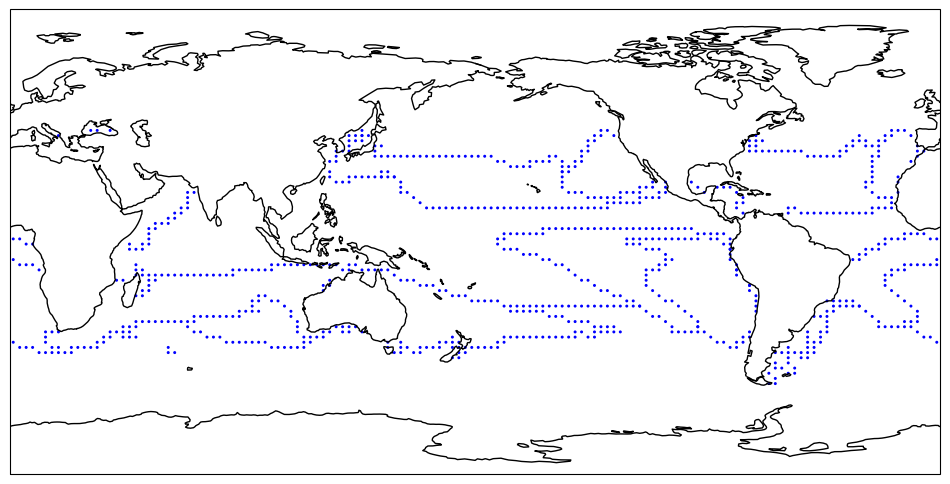

In [25]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree(180))
lons,lats = data2m_avg.lon,data2m_avg.lat

lon2d,lat2d = np.meshgrid(lons,lats) 

mask1 = np.diff(frac_map,axis=0,prepend=frac_map[0,0])
mask2 = np.diff(frac_map,axis=1,prepend=frac_map[0,0]) 

print(np.nanmin(mask1), np.nanmax(mask1))
print(np.nanmin(mask2), np.nanmax(mask2))

for value in [1,2,3]: 
    boundary_mask = (np.abs(mask1) == value) | (np.abs(mask2) == value)
    contours = ax.scatter(lon2d,lat2d, boundary_mask.astype(float)*1.3, transform=ccrs.PlateCarree(),color='blue')

ax.coastlines()


# plot regime-partitioning cloud feedback [compared with Myers 2021]

In [26]:
print(dics2.keys())

dict_keys(['v1', 'v2.OutTend'])


## Tim Myer's values

obs_Sc = 0.0922
obs_TrCu = 0.014
obs_Ascent = 0.0044
obs_Midlat = 0.089
obs_Total = 0.1979
 
obs_Sc_CI = 0.0607
obs_TrCu_CI = 0.044
obs_Ascent_CI = 0.0381
obs_Midlat_CI = 0.0539
obs_Total_CI = 0.1203

In [27]:
dics_Tim = {
    'StratCu'    : [0.0922,0.0607],
    'TradeCu'    : [0.0140,0.0440],
    'TropAscent' : [0.0044,0.0381],
    'MidLatOcn'  : [0.089, 0.0539],
    'TotalOcn'   : [0.1979,0.1203],
    'Global'     : [np.nan,np.nan],
}

## Figure S8

v1 LO680_NETdunobsc_fbk StratCu_avg data= 0.05 data_ref= -0.01 0.07790814045637645
v2.OutTend LO680_NETdunobsc_fbk StratCu_avg data= -0.01 data_ref= -0.01 0.07790814045637645
v1 LO680_NETdunobsc_fbk TradeCu_avg data= 0.12 data_ref= 0.02 0.19880091900436578
v2.OutTend LO680_NETdunobsc_fbk TradeCu_avg data= 0.02 data_ref= 0.02 0.19880091900436578
v1 LO680_NETdunobsc_fbk TropAscent_avg data= 0.07 data_ref= 0.03 0.15567633133304795
v2.OutTend LO680_NETdunobsc_fbk TropAscent_avg data= 0.03 data_ref= 0.03 0.15567633133304795
v1 LO680_NETdunobsc_fbk MidLatOcn_avg data= 0.04 data_ref= 0.06 0.20271734939006236
v2.OutTend LO680_NETdunobsc_fbk MidLatOcn_avg data= 0.06 data_ref= 0.06 0.20271734939006236
v1 LO680_NETdunobsc_fbk TotalOcn_avg data= 0.28 data_ref= 0.1 0.6351027401838526
v2.OutTend LO680_NETdunobsc_fbk TotalOcn_avg data= 0.1 data_ref= 0.1 0.6351027401838526
['StratCu\n[7.8%]', 'TradeCu\n[19.9%]', 'TropAscent\n[15.6%]', 'MidLatOcn\n[20.3%]', 'TotalOcn\n[63.5%]']


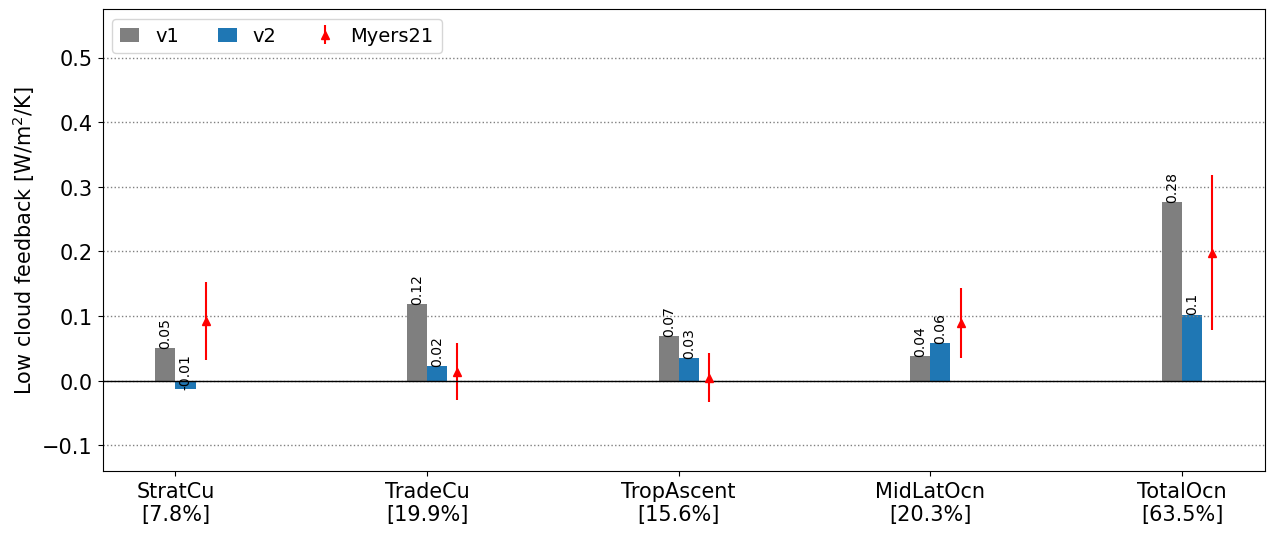

In [28]:
# regimes = ['StratCu','TradeCu','TropAscent','TropLand','MidLatOcn','MidLatLnd','HiLat','Global']

for tag2 in [
    # 'OwnRegime',
    'EnsembleRegime',
            ]:
    
    if tag2 == 'OwnRegime':
        dics = dics1
    elif tag2 == 'EnsembleRegime':
        dics = dics2
    
    # for tag_reg in ['pi','ab','cmb']:
    for tag_reg in ['avg']: # only dics1 has this right now 
    
        # ============= plotting ==================================
        fig = plt.figure(figsize=(15,6))
        nrow = 1
        ncol = 1

        gs = fig.add_gridspec(nrow,ncol) 

        if data_source == 'RK':
            Vars = ['netCRE_ano_grd_adj']
        elif data_source == 'CRK':
            Vars = ['LO680_NETdunobsc_fbk']

        for ivar,svar in enumerate(Vars):
            svar_out = svar.split('_')[0]

            ax  = fig.add_subplot(gs[0, 0])

            regimes_w_frc = [] 
            for ikey,regh in enumerate(regimes):
                if regh == 'Global':
                    continue
                reg = regh+'_'+tag_reg

                ### plot the mean cloud feedbacks =======================
                count = 0 
                for icase,case in enumerate(dics.keys()):
                # for icase,case in enumerate(['v1','v2.OutTend']):
                    case_out = case_stamp_out[icase]

                    if icase == len(dics.keys())-1:
                        case_ref0 = case
                    else:
                        if tag == 'gradual':
                            case_ref0 = case_stamp[icase+1]
                        elif tag == 'single' or tag == 'MG_single':
                            case_ref0 = case_stamp[-1]

                    # print(dics[case][svar].keys())
                    data = v1v2.area_averager(dics[case][svar][reg]).values
                    data_ref = v1v2.area_averager(dics[case_ref0][svar][reg]).values
                    
                    data_frc = v1v2.area_averager(dics[case][svar][regh+'_frc_avg']).values

                    print(case,svar,reg,'data=',data.round(2),'data_ref=',data_ref.round(2), data_frc)
                    if icase == 0: 
                        regimes_w_frc.append(regh+'\n['+str(np.round(data_frc*100,1))+'%]')
                    
                    if ikey == 0:
                        label = case_stamp_out[icase]
                    else:
                        label = '_nolegend_'

                    width = 0.4

                    if 'Global' in reg:
                        ax2.bar(ikey*5+count*width,data,width=width,label=label,facecolor=colors[icase],edgecolor='none') 
                    else:
                        ax.bar(ikey*5+count*width,data,width=width,label=label,facecolor=colors[icase],edgecolor='none') 
                        ax.text(ikey*5+count*width,data,str(np.round(data,2)),va='bottom',ha='center',fontsize=10,rotation=90) 
                        
                    ### add Tim Myer's obs values
                    if count == len(dics.keys())-1: 
                        if ikey == 0:
                            label = 'Myers21'
                        else:
                            label = '_nolegend_'
                        data_obs = dics_Tim[regh][0]
                        data_ci  = dics_Tim[regh][1] 
                        ax.errorbar(ikey*5+count*width+width, data_obs, data_ci,
                                    linestyle='None', marker='^', c='red',
                                   label = label)
                        # ax.errorbar(x, y, e, linestyle='None', marker='^')

                    count += 1

                    # # ---------------- add the text for case and case_ref ------------------
                    # case_ref = list(dics.keys())[0]
                    # data_ref = v1v2.area_averager(dics[case_ref][svar][reg]).values
                    # if case == case_stamp[-1]:
                    #     # ypos = -0.25
                    #     if 'Global' in reg:
                    #         ypos = -0.12 * 4
                    #         ax2.text(ikey*5+1,ypos,np.round(data-data_ref,2),rotation=0,ha='center',va='center')
                    #     else:
                    #         ypos = -0.12 
                    #         ax.text(ikey*5+1,ypos,np.round(data-data_ref,2),rotation=0,ha='center',va='center')

               # ===============================================================

            print(regimes_w_frc)
            # ===============================================================
            if tag == 'MG_single' and svar == 'SWCRE_adj':
                ax.legend(ncol=2,loc='upper center',bbox_to_anchor=(0.5, 0.9, 0.1, 0.1)) 

            # ax.legend(bbox_to_anchor=(0.15,-0.2,0.8,0.1),ncol=3)    
            ax.legend(ncol=3,loc='upper left')

            # if len(Vars) > 1: 
            #     ax.set_title('('+chr(ord('`')+(ivar+1))+') ',loc='left')
            # else:
            #     if tag == 'single':
            #         ax.set_title('(b)',loc='left')
            #     elif tag == 'gradual':
            #         ax.set_title('(a)',loc='left')

            vmin = -0.1 + (-0.04)
            vmax = 0.55 + (0.025)
            ax.set_ylim((vmin,vmax))

            # vmin = -0.1*4 +(-0.04)*4   
            # vmax = 0.2*4 + (0.025)*4
            # # ax2.set_ylim((vmin,vmax))
            # ax2.set_xticks([len(regimes)*5-5+1.3])
            # ax2.set_xticklabels([regimes[-1]])
            # ax2.yaxis.tick_right()
            # ax2.grid(axis='y',lw=1,color='grey',ls=':')

            if data_source == 'RK': 
                ax.set_ylabel(svar_out.split('CRE')[0]+' cloud feedback [W/m$^2$/K]')
            elif data_source == 'CRK':
                ax.set_ylabel('Low cloud feedback [W/m$^2$/K]')
                
            ax.axhline(y=0,ls='-',color='black',lw=1)
            ax.grid(axis='y',lw=1,color='grey',ls=':')

            if tag2 == 'EnsembleRegime':
                addtxt = 'ensemble-mean'
            if tag2 =='OwnRegime':
                addtxt = 'its own'

            if tag_reg == 'pi':
                title = 'Partitioning based on '+addtxt+' CTL OMEGA700 and EIS'
            if tag_reg == 'ab':
                title = 'Partitioning based on '+addtxt+' P4K OMEGA700 and EIS'
            if tag_reg == 'cmb':
                title = 'Partitioning based on '+addtxt+' CTL&P4K OMEGA700 and EIS [no transition regime]'
            if tag_reg == 'avg':
                title = 'Partitioning based on '+addtxt+' averaged OMEGA700 and EIS from CTL and P4K' 
            # ax.set_title(title)

            if ncol == 2:
                rotation = 0 #45
            else:
                rotation = 0
            
            ax.set_xticks(np.arange(1,len(regimes[:-1])*5,5)-2*width)
            ax.set_xticklabels(regimes_w_frc[:],rotation=rotation)

        fig.savefig(figdir+'Barplot_FixedRegime_'+Vars[-1]+'_'+tag+'_'+tag2+'_'+tag_reg+'_'+dd+'.png',dpi=300,bbox_inches='tight')
        fig.savefig(figdir+'Barplot_FixedRegime_'+Vars[-1]+'_'+tag+'_'+tag2+'_'+tag_reg+'_'+dd+'.pdf',bbox_inches='tight')


## Figure S7 [Myers regime]

dict_keys(['LO680_NETdunobsc_fbk'])


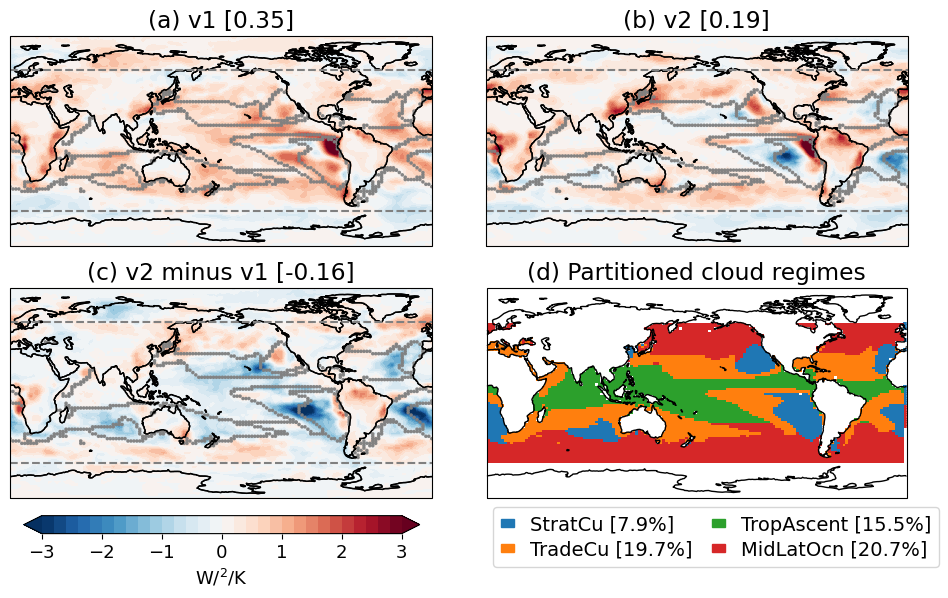

In [16]:
datadir = workdir+"diag_feedback_E3SM/data/"

add_box = False # add box
add_gridline = False # add grid lines
add_markers = False # add specific markers
add_ticks = False # add tick markers

for flag in ['v1v2']:  # Figure 2 and Figure S2
    
    if flag == 'v1v2coupled':
        case1_out = 'v1_coupled'
        case2_out = 'v2_coupled'
    if flag == 'v1v2':
        case1_out = 'v1'
        case2_out = 'v2'

    Vars = ['LO680_NETdunobsc_fbk']

    ## ===============================================
    ## read data
    ## ===============================================
    
    dics = {} 
    dics_st = {} 

    for var in Vars: 
        if var in ['netCRE_ano_grd_adj','SWCRE_ano_grd_adj','LWCRE_ano_grd_adj']:
                varout = var.split('_')[0]
                f1 = xr.open_dataset(datadir+'lat-lon-gfdbk-CMIP6-'+case1_out+'.nc')
                f2 = xr.open_dataset(datadir+'lat-lon-gfdbk-CMIP6-'+case2_out+'.nc')

                levels = np.arange(-3,3.2,0.2)
                levels_d = levels

                if flag != 'v1v2coupled': 
                    f1_st = xr.open_dataset(datadir+'lat-lon-gfdbk-anom-CMIP6-'+case1_out+'.nc')
                    f2_st = xr.open_dataset(datadir+'lat-lon-gfdbk-anom-CMIP6-'+case2_out+'.nc')
                else: 
                    # The following two files are generated by /global/homes/q/qinyi/tmp_scripts/cal_RadKern_regime_stderr.py on NERSC 
                    f1_st = xr.open_dataset(datadir+'test-rad_perK_latlon_abrupt-4xCO2_E3SM-1-0_r1i1p1f1_1yr-150yr.nc')
                    f2_st = xr.open_dataset(datadir+'test-rad_perK_latlon_abrupt-4xCO2_E3SM-2-0_r1i1p1f1_1yr-150yr.nc')
           
        if var in ['HI680_SWcld_tot','LO680_SWcld_tot','ALL_SWcld_tot','LO680_NETcld_tot']: 
            varout = var
            f1 = xr.open_dataset(datadir+'global_cloud_feedback_'+case1_out+'.nc')
            f2 = xr.open_dataset(datadir+'global_cloud_feedback_'+case2_out+'.nc')

            levels = np.arange(-3,3.2,0.2)
            levels_d = levels 

        if var in ['LO680_NETdunobsc_fbk']: 
            varout = var
            f1 = xr.open_dataset(workdir+"diag_feedback_E3SM/test1003/"+'global_cloud_feedback_obsc_'+case1_out+'.nc')
            f2 = xr.open_dataset(workdir+"diag_feedback_E3SM/test1003/"+'global_cloud_feedback_obsc_'+case2_out+'.nc')
            
            levels = np.arange(-3,3.2,0.2)
            levels_d = levels 
            
        if var in ['EIS_ano_clim','EIS_pi_clim']:
            varout = var 
            f1 = xr.open_dataset(datadir+'global_EIS_'+case1_out+'.nc')
            f2 = xr.open_dataset(datadir+'global_EIS_'+case2_out+'.nc')

            if 'ano' in var:
                levels = np.arange(-0.5,0.6,0.1)
                levels_d = np.arange(-0.2,0.24,0.04)
            else:
                levels = np.arange(-2,12,2)
                levels_d = np.arange(-1,1.2,0.2)


        if var == 'LO680_NETcld_tot':
            data = f1['LO680_SWcld_tot'] + f1['LO680_LWcld_tot']
            # ensure the lat and lon names
            latnew, lonnew = list(data.coords.keys())[0], list(data.coords.keys())[1]
            data = data.rename({lonnew: 'lon',latnew: 'lat'})
            
            data2 = f2['LO680_SWcld_tot'] + f2['LO680_LWcld_tot']
            # ensure the lat and lon names
            latnew, lonnew = list(data2.coords.keys())[0], list(data2.coords.keys())[1]
            data2 = data2.rename({lonnew: 'lon',latnew: 'lat'})
            
        elif var == 'LO680_NETdunobsc_fbk':
            data = f1['LO680_SWdunobsc_fbk'] + f1['LO680_LWdunobsc_fbk']
            # ensure the lat and lon names
            latnew, lonnew = list(data.coords.keys())[0], list(data.coords.keys())[1]
            data = data.rename({lonnew: 'lon',latnew: 'lat'})
            
            data2 = f2['LO680_SWdunobsc_fbk'] + f2['LO680_LWdunobsc_fbk']
            # ensure the lat and lon names
            latnew, lonnew = list(data2.coords.keys())[0], list(data2.coords.keys())[1]
            data2 = data2.rename({lonnew: 'lon',latnew: 'lat'})
            
        else:
            data = f1[var]
            data2 = f2[var]

        dics[var] = [data,data2,data2-data]


    lons = data.lon[:]
    lats = data.lat[:]
    
    print(dics.keys())
    
    #==================== plots =================================
    # fig = plt.figure(figsize=(16,9))
    fig = plt.figure(figsize=(12,6))
    nrow = 2
    ncol = 4

    gs = GridSpec(nrow,ncol, figure=fig)

    cmap = 'RdBu_r'

    ii = 0 
    for var in dics.keys():

        varout = var.split('_')[0] 

        if 'coupled' in case1_out:
            cases_out = [case1_out.split('_')[0]+' [abrupt4xCO2]', 
                         case2_out.split('_')[0]+' [abrupt4xCO2]', 
                         case2_out.split('_')[0]+' [abrupt4xCO2]'+' minus '+case1_out.split('_')[0]+' [abrupt4xCO2]']


        else:
            cases_out = [case1_out.split('.')[-1], case2_out.split('.')[-1], case2_out.split('.')[-1]+' minus '+case1_out.split('.')[-1]] 

        for ida,da in enumerate(dics[var]):

            # ax1 = fig.add_subplot(nrow,ncol,ii+1,projection=ccrs.PlateCarree(180))
            if ida == 0:
                axx = gs[0,0:2]
            elif ida == 1:
                axx = gs[0,2:]
            else:
                # axx = gs[1,1:3]
                axx = gs[1,0:2] 

            ax1 = fig.add_subplot(axx,projection=ccrs.PlateCarree(180))

            im = ax1.contourf(lons,lats,da,transform=ccrs.PlateCarree(),levels=levels,cmap=cmap,extend='both')

            ax1.coastlines()
            avgdata = v1v2.area_averager(da).values 

            if 'coupled' in case1_out and (ii+1) in [3,6,9]:
                plt.title('('+chr(ord('`')+(ii+1))+') '+'('+chr(ord('`')+(ii))+') minus '+'('+chr(ord('`')+(ii-1))+')'+' ['+str(np.round(avgdata,2))+']')
            else:
                plt.title('('+chr(ord('`')+(ii+1))+') '+cases_out[ida]+' ['+str(np.round(avgdata,2))+']')

            # =========================================================================
            ## Read frac_map and overlay to the contourf map
            with xr.open_dataset(figdir+'saved_frac_map_Myers.nc') as f1:
                frac_map = f1['frac_map']

            lon2d,lat2d = np.meshgrid(frac_map.lon,frac_map.lat) 

            mask1 = np.diff(frac_map,axis=0,prepend=frac_map[0,0])
            mask2 = np.diff(frac_map,axis=1,prepend=frac_map[0,0]) 

            for value in [1,2,3]: 
                boundary_mask = (np.abs(mask1) == value) | (np.abs(mask2) == value)
                contours = ax1.scatter(lon2d,lat2d, boundary_mask.astype(float)*10, 
                                      transform=ccrs.PlateCarree(),color='grey',marker='.',alpha=0.9)

            ax1.coastlines()
            for ypos in [-60,60]:
                ax1.axhline(y=ypos,ls='--',c='grey')

            ii += 1

    axx = gs[1,2:] 
    axf = fig.add_subplot(axx,projection=ccrs.PlateCarree(180))

    regimes = ['StratCu','TradeCu','TropAscent','MidLatOcn']
    colorsh = v1v2.get_color('tab10',len(regimes))
    frac_values = [7.9, 19.7, 15.5, 20.7]  
    cmap = mpl.colors.LinearSegmentedColormap.from_list("", colorsh)

    lon2d,lat2d = np.meshgrid(frac_map.lon,frac_map.lat) 
    imf = axf.pcolormesh(lon2d,lat2d,frac_map,transform=ccrs.PlateCarree(),cmap=cmap)
    axf.set_global()
    axf.coastlines()
    axf.set_title('(d) Partitioned cloud regimes') 

    patches = []
    for ireg,reg in enumerate(regimes): 
        patch = mpatches.Patch(color=colorsh[ireg], label=reg+' ['+str(frac_values[ireg])+'%]')
        patches.append(patch)
    axf.legend(handles=patches,ncol=2,bbox_to_anchor=(0.3,-0.1,0.8,0.1),
               handleheight=0.3, handlelength=0.7,labelspacing=0.3,columnspacing=1.0)

    # ------------- add common colorbar ----------------------
    if len(Vars) == 3:
        pos2 = [0.92, 0.15, 0.015, 0.2] # [x0,y0,width,height]
    else:
        pos2 = [0.15,0.05,0.33,0.03] 

    fh = 13

    cbar_ax = fig.add_axes(pos2)
    cb = fig.colorbar(im,ax=ax1, orientation='horizontal', cax=cbar_ax)
    cb.set_label('W/$^2$/K',fontsize=fh)
    cb.ax.tick_params(labelsize=fh)
    tick_locator = ticker.MaxNLocator(nbins=7)
    cb.locator = tick_locator
    cb.update_ticks()

    fig.subplots_adjust(wspace=0.1)

    fig.savefig(figdir+'LatLon_fdbkpatt_'+flag+'_'+Vars[-1]+'_MyersRegime_'+dd+'.png',dpi=300,bbox_inches='tight')
    fig.savefig(figdir+'LatLon_fdbkpatt_'+flag+'_'+Vars[-1]+'_MyersRegime_'+dd+'.pdf',bbox_inches='tight')


# Quick check the obsc map

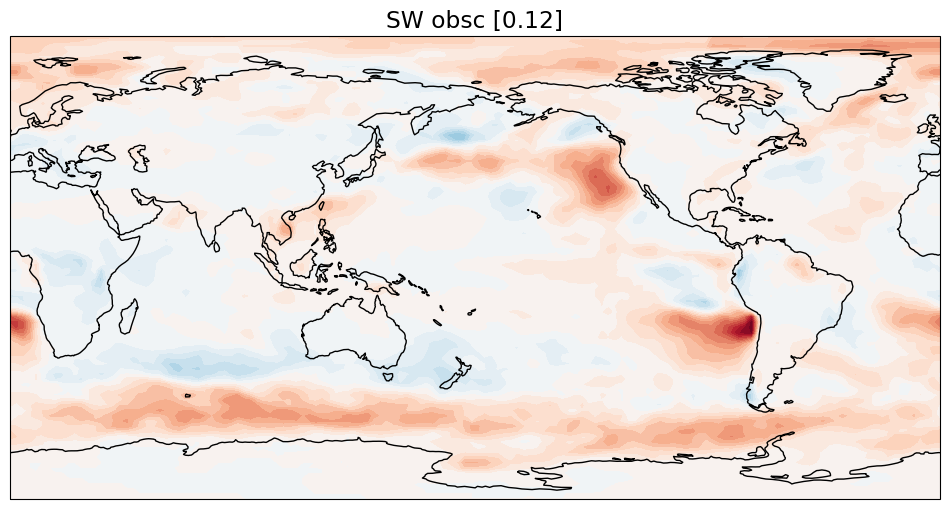

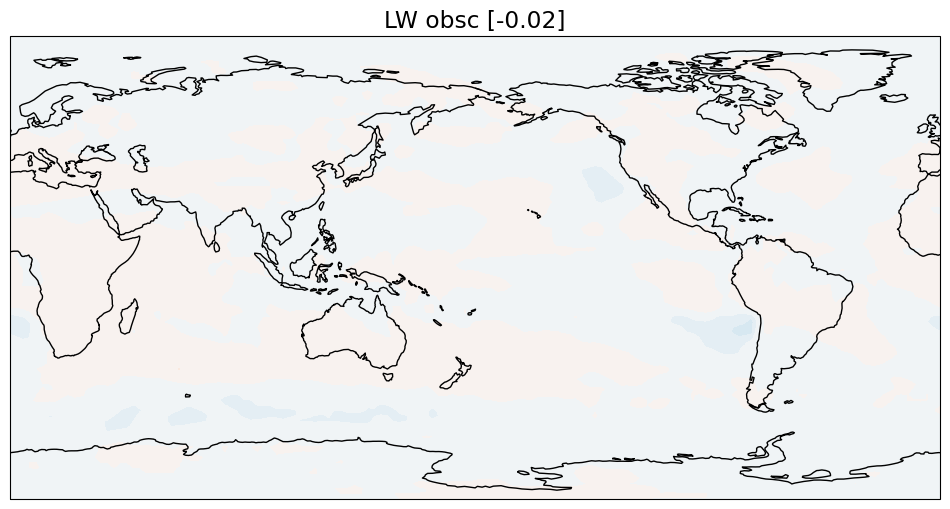

In [35]:
with xr.open_dataset('/p/user_pub/climate_work/qin4/From_Compy/home_dir/diag_feedback_E3SM/test1003/global_cloud_feedback_obsc_v2.OutTend.nc') as f1:
    LO680_SWdobsc_fbk = f1['LO680_SWdobsc_fbk']
    LO680_LWdobsc_fbk = f1['LO680_LWdobsc_fbk']
    
lons = LO680_SWdobsc_fbk.lon
lats = LO680_SWdobsc_fbk.lat

for data,varname in zip([LO680_SWdobsc_fbk, LO680_LWdobsc_fbk], ['SW obsc', 'LW obsc']): 
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree(180))
    ax.contourf(lons,lats,data,transform=ccrs.PlateCarree(),levels=np.arange(-3,3.2,0.2),cmap='RdBu_r',extend='both')
    ax.coastlines()

    avg = v1v2.area_averager(data).values
    ax.set_title(varname+' ['+str(np.round(avg,2))+']')
    